# Lending Club CaseStudy

## Business Understanding
Consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

**If a person is likely to default**
- denying the loan
- reducing the amount of loan
- lending at a higher interest rate

**Scenario that can happen if company accepted loan:**
- Fully paid: Applicant has fully paid the loan
- Current: Applicant is in the process of paying the instalments
- Charged-off: Applicant has not paid the instalments in due time

# Objective
### The company wants to understand the driving factors (or driver variables) behind loan default
Risk analysis for a consumer finance company that to make a decision about whether to lend loan to a applicant or not. The risks are determined according to the candidate's profile.
The variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment. 

## Methods Used
- Exploratory Data Analysis
- Data Visualization

## Technologies
- Python
- Pandas
- Seaborn
- Matplotlib

## Data Understanding
Data contains the complete loan data for all loans issued through the time period 2007 to 2011.


In [1]:
# Importing packages
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 55)

### Load the data file and pre-processing

In [52]:
# Reading file
df = pd.read_csv('./loan/loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,...,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [53]:
# Converting string values to lowercase
cat_cols = df.select_dtypes(include=["bool_","object_"]).columns
for col in cat_cols:
    df[col] = df[col].str.lower()

In [54]:
# Removing columns having na value more then 80% 
na_col = []
for col in df.columns:
    na_percent = (df[col].isna().sum()/len(df[col]))*100
    if na_percent>80:
        na_col.append(col)

df.drop(na_col, inplace=True, axis=1)
print("Columns have more then 80% na values: ", " ".join(na_col))

Columns have more then 80% na values:  mths_since_last_record next_pymnt_d mths_since_last_major_derog annual_inc_joint dti_joint verification_status_joint tot_coll_amt tot_cur_bal open_acc_6m open_il_6m open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit


In [55]:
# Checking if column values are unique more then 99% for object type
col_del=[]
for col in df.columns:
    unique_percent = len(set(df[col].dropna()))/len(df[col].dropna())*100
    if unique_percent>99 and (str(df[col].dtype) == "object" or "id" in col):
        print(f"{col:<50} {unique_percent:<50} {df[col].dtype}")
        col_del.append(col)
df.drop(col_del, inplace=True, axis=1)
print("Above categorical columns have all unique values")

id                                                 100.0                                              int64
member_id                                          100.0                                              int64
url                                                100.0                                              object
desc                                               99.00287560219591                                  object
Above categorical columns have all unique values


In [56]:
# Removing columns containing same value
same_value_col = []
for col in df.columns:
    if len(df[col].dropna().unique()) == 1:
        same_value_col.append(col)
df.drop(same_value_col, inplace=True, axis=1)
print("All these columns have same values in them: ", " ".join(same_value_col))

All these columns have same values in them:  pymnt_plan initial_list_status collections_12_mths_ex_med policy_code application_type acc_now_delinq chargeoff_within_12_mths delinq_amnt tax_liens


In [57]:
# droping zip_code it contain half information eg:100xx
drop_col = ["zip_code"]
df.drop(drop_col, axis=1, inplace=True)

In [58]:
# Correcting format of values
# Removing month from term
df["term"] = df["term"].apply(lambda x: int(x.split()[0]))
# Removing % from interest rate
df["int_rate"] = df["int_rate"].apply(lambda x: float(x.replace("%", "")))
# Removing % from interest rate
df["revol_util"] = df["revol_util"].apply(lambda x: float(x.replace("%", "") if x is not np.nan else x))
# Removing year from employment length
df["emp_length"] = df["emp_length"].apply(lambda x: int(re.sub("year| years|\+|<| ", "", x)) if x is not np.nan else x)

## Visualization
### Univariate Analysis

In [62]:
d = pd.read_excel("Data_Dictionary.xlsx")

**Loan amount**<br>
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

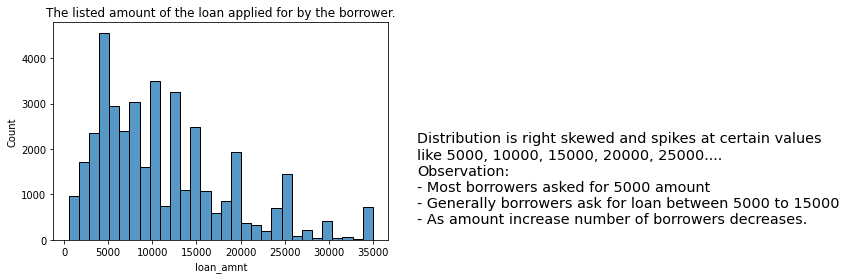

In [60]:
sns.histplot(df["loan_amnt"], bins=30)
conclusion='''Distribution is right skewed and spikes at certain values 
like 5000, 10000, 15000, 20000, 25000....
Observation:
- Most borrowers asked for 5000 amount
- Generally borrowers ask for loan between 5000 to 15000
- As amount increase number of borrowers decreases.
'''
plt.title("The listed amount of the loan applied for by the borrower.")
_ = plt.text( x=40000, y=0, s=conclusion, fontsize="x-large")

**Term**<br>
The number of payments on the loan. Values are in months and can be either 36 or 60.


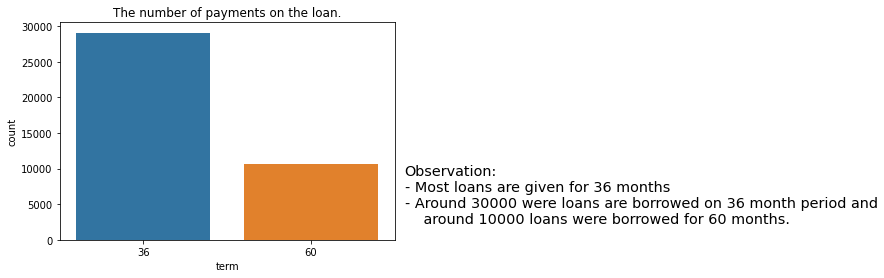

In [66]:
sns.countplot(df["term"])
conclusion='''
Observation:
- Most loans are given for 36 months
- Around 30000 were loans are borrowed on 36 month period and
    around 10000 loans were borrowed for 60 months.
'''
plt.title("The number of payments on the loan.")
_ = plt.text( x=1.56, y=0, s=conclusion, fontsize="x-large")

**int_rate**<br>
Interest Rate on the loan

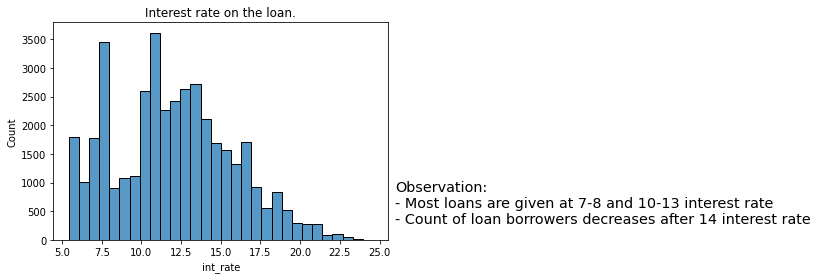

In [13]:
sns.histplot(df["int_rate"], bins=30)
conclusion='''
Observation:
- Most loans are given at 7-8 and 10-13 interest rate 
- Count of loan borrowers decreases after 14 interest rate 
'''
plt.title("Interest rate on the loan.")
_ = plt.text( x=26, y=0, s=conclusion, fontsize="x-large")
plt.show()

**grade**<br>
LC assigned loan grade

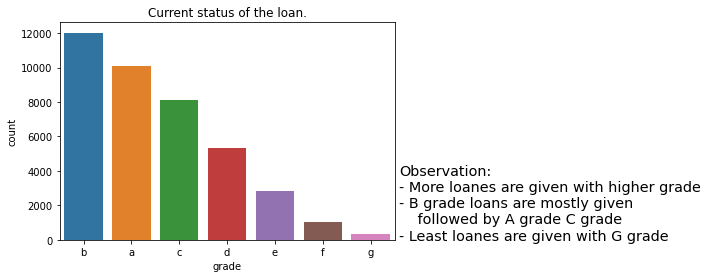

In [67]:
sns.countplot(df["grade"], order=df["grade"].value_counts().index)
conclusion='''
Observation:
- More loanes are given with higher grade
- B grade loans are mostly given 
    followed by A grade C grade
- Least loanes are given with G grade'''
plt.title("Current status of the loan.")
_ = plt.text( x=6.6, y=0, s=conclusion, fontsize="x-large")
plt.show()

**loan_status**<br>
Current status of the loan

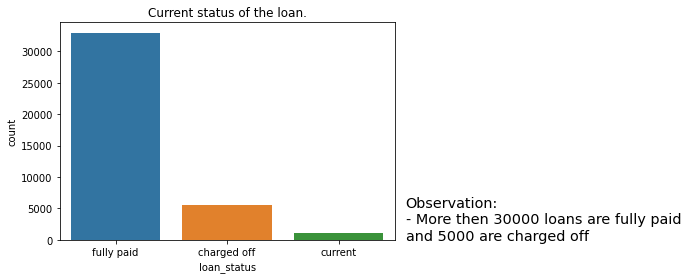

In [15]:
sns.countplot(df["loan_status"])
conclusion='''
Observation:
- More then 30000 loans are fully paid 
and 5000 are charged off'''
plt.title("Current status of the loan.")
_ = plt.text( x=2.6, y=0, s=conclusion, fontsize="x-large")
plt.show()

**emp_length**<br>
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

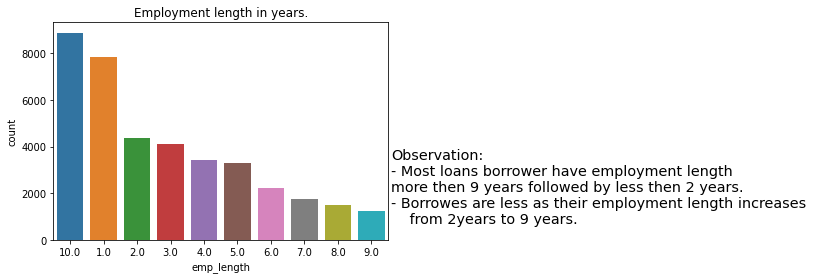

In [16]:
sns.countplot(df["emp_length"], order=df["emp_length"].value_counts().index)
conclusion='''
Observation:
- Most loans borrower have employment length 
more then 9 years followed by less then 2 years.
- Borrowes are less as their employment length increases
    from 2years to 9 years. 
'''
plt.title("Employment length in years.")
_ = plt.text( x=9.6, y=0, s=conclusion, fontsize="x-large")
plt.show()

**purpose**<br>
A category provided by the borrower for the loan request.

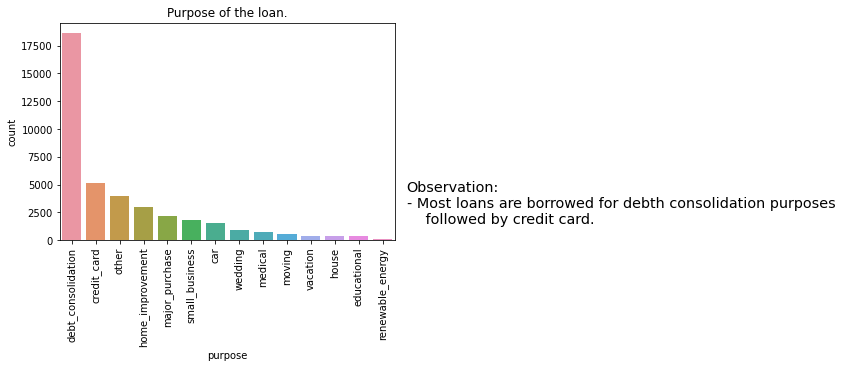

In [17]:
sns.countplot(df["purpose"], order=df["purpose"].value_counts().index)
conclusion='''
Observation:
- Most loans are borrowed for debth consolidation purposes
    followed by credit card.
'''
plt.title("Purpose of the loan.")
plt.xticks(rotation=90)
_ = plt.text(x=14, y=0, s=conclusion, fontsize="x-large")
plt.show()

**home_ownership**<br>
The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.'

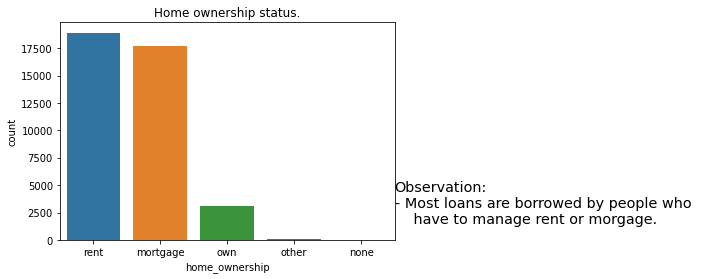

In [18]:
sns.countplot(df["home_ownership"], order=df["home_ownership"].value_counts().index)
conclusion='''
Observation:
- Most loans are borrowed by people who 
    have to manage rent or morgage.
'''
plt.title("Home ownership status.")
# plt.xticks(rotation=90)
_ = plt.text(x=4.5, y=0, s=conclusion, fontsize="x-large")
plt.show()

**annual_inc**<br>
The self-reported annual income provided by the borrower during registration.

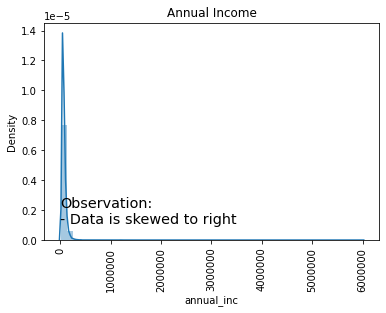

In [79]:
sns.distplot(df["annual_inc"])
conclusion='''
Observation:
- Data is skewed to right
'''
plt.title("Annual Income")
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='x')
_ = plt.text(x=0, y=0, s=conclusion, fontsize="x-large")
plt.show()

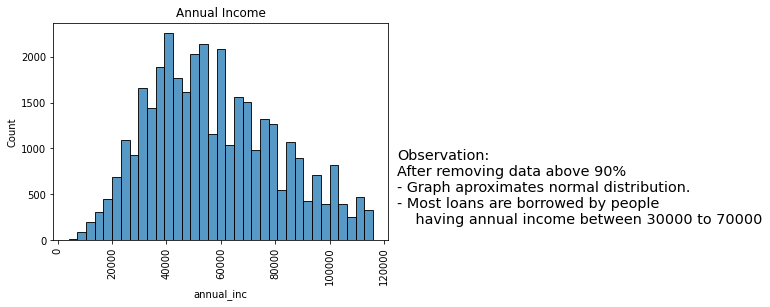

In [80]:
# Since there is skewness in income we need to remove few data which is above 90 quantile for better plot
income_90_per = df["annual_inc"].quantile(.9)
annual_inc = df["annual_inc"][df["annual_inc"]<=income_90_per]

sns.histplot(annual_inc, bins=35)
conclusion='''
Observation:
After removing data above 90%
- Graph aproximates normal distribution.
- Most loans are borrowed by people
    having annual income between 30000 to 70000
'''
plt.title("Annual Income")
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='x')
_ = plt.text(x=125000, y=0, s=conclusion, fontsize="x-large")
plt.show()

**DTI**<br>
A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

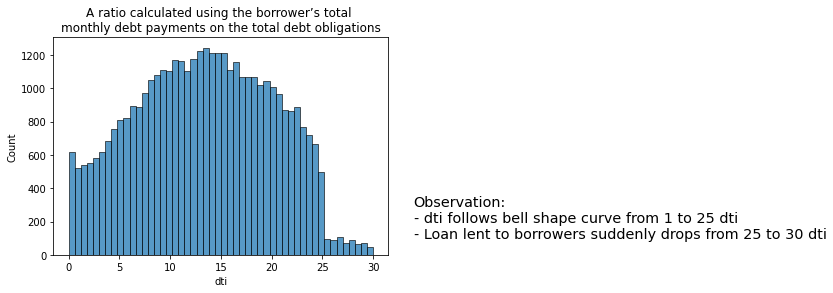

In [81]:
sns.histplot(df.dti)
conclusion='''
Observation:
- dti follows bell shape curve from 1 to 25 dti
- Loan lent to borrowers suddenly drops from 25 to 30 dti
'''
plt.title("A ratio calculated using the borrower’s total \nmonthly debt payments on the total debt obligations")
# plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='x')
_ = plt.text(x=34, y=0, s=conclusion, fontsize="x-large")
plt.show()

**verification_status**<br>
Indicates if income was verified by LC, not verified, or if the income source was verified

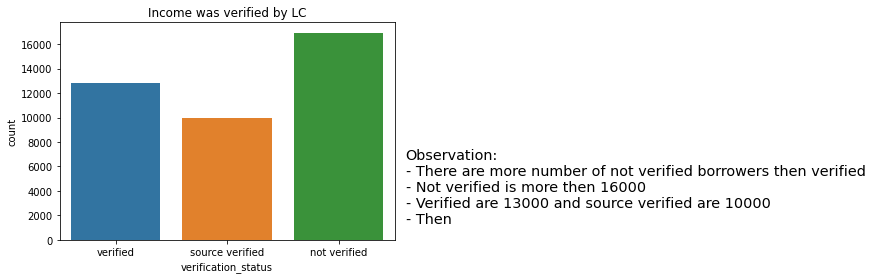

In [82]:
sns.countplot(df.verification_status)
conclusion='''
Observation:
- There are more number of not verified borrowers then verified
- Not verified is more then 16000
- Verified are 13000 and source verified are 10000
- Then 
'''
plt.title("Income was verified by LC")
_ = plt.text(x=2.6, y=0, s=conclusion, fontsize="x-large")
plt.show()

### Bivariate Analysis

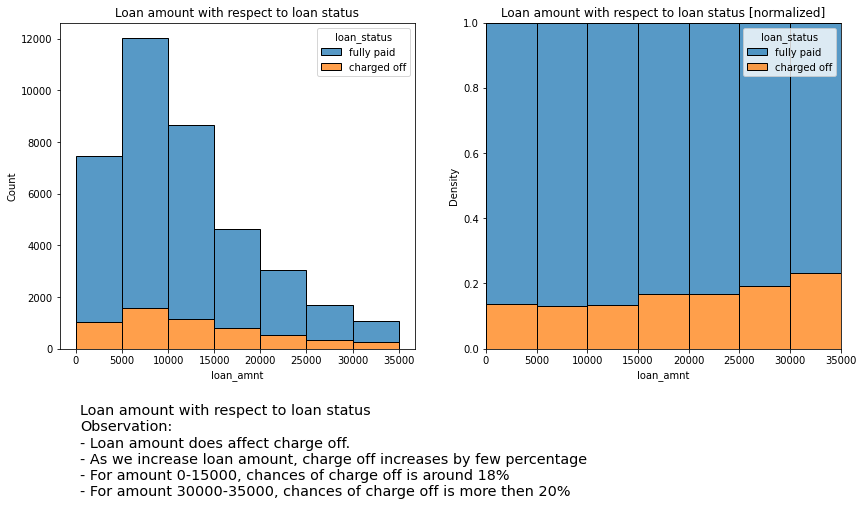

In [89]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
sns.histplot(x=df["loan_amnt"], hue=df.loan_status, hue_order=["fully paid", "charged off"], bins=list(range(0, 40000, 5000)), multiple="stack", ax=ax[0])
sns.histplot(x=df["loan_amnt"], hue=df.loan_status, hue_order=["fully paid", "charged off"], bins=list(range(0, 40000, 5000)), multiple="fill", stat="density", ax=ax[1])
conclusion='''
Loan amount with respect to loan status
Observation:
- Loan amount does affect charge off.
- As we increase loan amount, charge off increases by few percentage
- For amount 0-15000, chances of charge off is around 18%
- For amount 30000-35000, chances of charge off is more then 20%
'''
ax[0].set_title("Loan amount with respect to loan status")
ax[1].set_title("Loan amount with respect to loan status [normalized]")
_ = plt.text( x=-40000, y=-0.5, s=conclusion, fontsize="x-large")

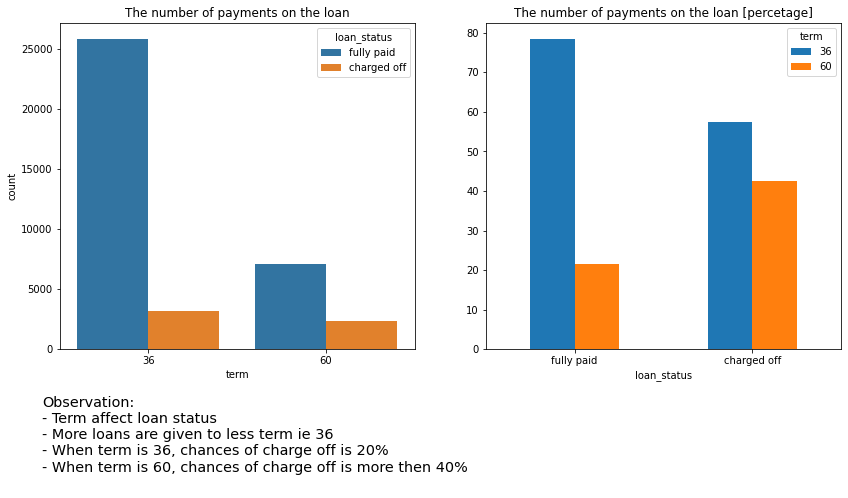

In [84]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
sns.countplot(df.term, hue=df.loan_status, hue_order=["fully paid", "charged off"], ax=ax[0])
temp2 = (df.term.groupby(by=df.loan_status).value_counts(normalize=True)[["fully paid", "charged off"]].unstack()*100)
temp2.plot.bar(ax=ax[1])
conclusion='''
Observation:
- Term affect loan status
- More loans are given to less term ie 36
- When term is 36, chances of charge off is 20%
- When term is 60, chances of charge off is more then 40%
'''
plt.xticks(rotation=0)
ax[0].set_title("The number of payments on the loan")
ax[1].set_title("The number of payments on the loan [percetage]")
_ = plt.text( x=-3, y=-35, s=conclusion, fontsize="x-large")

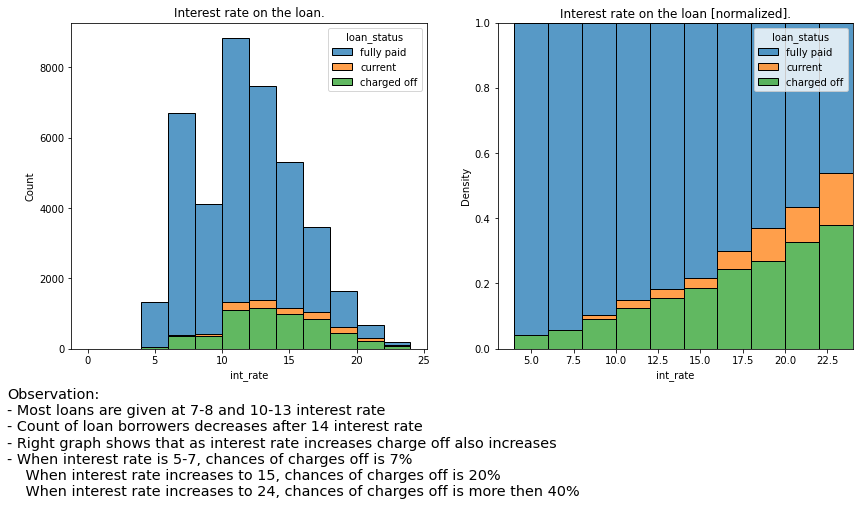

In [86]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
sns.histplot(x=df["int_rate"], hue=df.loan_status, hue_order=["fully paid", "current", "charged off"], bins=list(range(0, 26, 2)), multiple="stack", ax=ax[0])
sns.histplot(x=df["int_rate"], hue=df.loan_status, hue_order=["fully paid", "current", "charged off"], bins=list(range(0, 26, 2)), multiple="fill", stat="density", ax=ax[1])
conclusion='''
Observation:
- Most loans are given at 7-8 and 10-13 interest rate 
- Count of loan borrowers decreases after 14 interest rate
- Right graph shows that as interest rate increases charge off also increases
- When interest rate is 5-7, chances of charges off is 7%
    When interest rate increases to 15, chances of charges off is 20%
    When interest rate increases to 24, chances of charges off is more then 40%
'''
ax[0].set_title("Interest rate on the loan.")
ax[1].set_title("Interest rate on the loan [normalized].")
_ = plt.text( x=-26, y=-0.5, s=conclusion, fontsize="x-large")
plt.show()

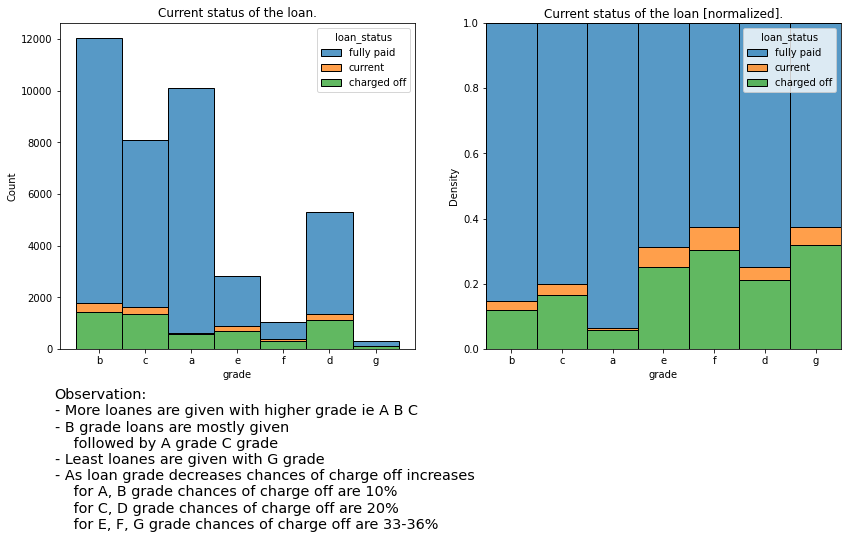

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
sns.histplot(x=df["grade"], hue=df.loan_status, hue_order=["fully paid", "current","charged off"], multiple="stack", discrete =True, ax=ax[0])
sns.histplot(x=df["grade"], hue=df.loan_status, hue_order=["fully paid", "current","charged off"], multiple="fill", stat="density", ax=ax[1])
conclusion='''
Observation:
- More loanes are given with higher grade ie A B C
- B grade loans are mostly given 
    followed by A grade C grade
- Least loanes are given with G grade
- As loan grade decreases chances of charge off increases
    for A, B grade chances of charge off are 10%
    for C, D grade chances of charge off are 20%
    for E, F, G grade chances of charge off are 33-36%
'''
ax[0].set_title("Current status of the loan.")
ax[1].set_title("Current status of the loan [normalized].")
_ = plt.text( x=-9, y=-.6, s=conclusion, fontsize="x-large")
plt.show()

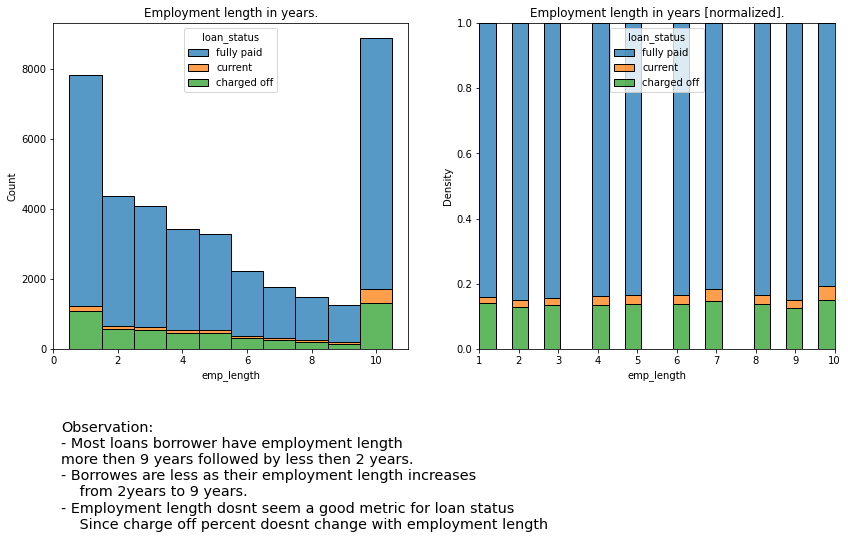

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
sns.histplot(x=df["emp_length"], hue=df.loan_status, hue_order=["fully paid", "current", "charged off"], multiple="stack", discrete =True, ax=ax[0])
sns.histplot(x=df["emp_length"], hue=df.loan_status, hue_order=["fully paid", "current", "charged off"], multiple="fill", stat="density", ax=ax[1])

conclusion='''
Observation:
- Most loans borrower have employment length 
more then 9 years followed by less then 2 years.
- Borrowes are less as their employment length increases
    from 2years to 9 years. 
- Employment length dosnt seem a good metric for loan status
    Since charge off percent doesnt change with employment length
'''
ax[0].set_title("Employment length in years.")
ax[1].set_title("Employment length in years [normalized].")
_ = plt.text( x=-9.6, y=-0.6, s=conclusion, fontsize="x-large")
plt.show()

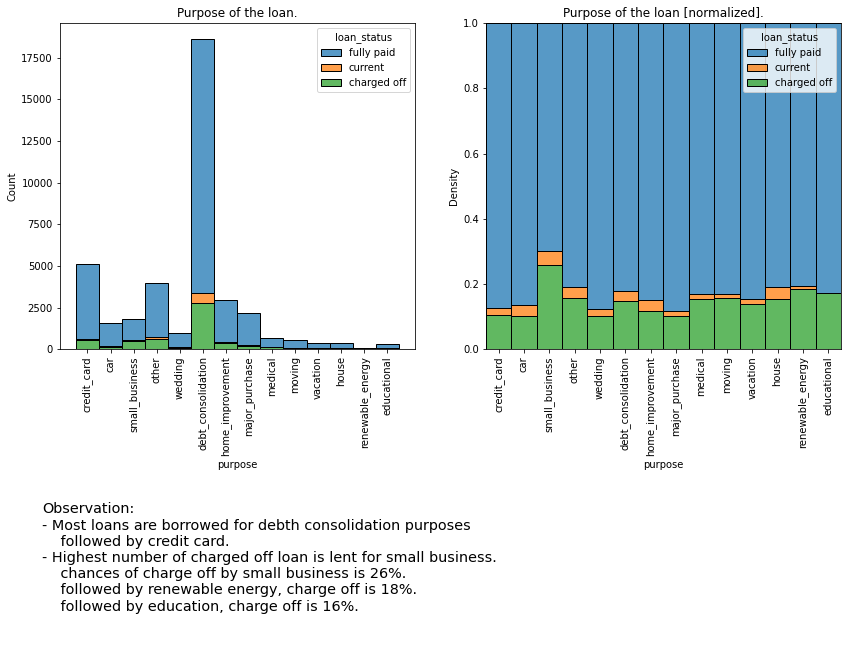

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
sns.histplot(x=df["purpose"], hue=df.loan_status, hue_order=["fully paid", "current", "charged off"], multiple="stack", discrete =True, ax=ax[0])
sns.histplot(x=df["purpose"], hue=df.loan_status, hue_order=["fully paid", "current", "charged off"], multiple="fill", stat="density", ax=ax[1])

# sns.countplot(df["purpose"], order=df["purpose"].value_counts().index)
conclusion='''
Observation:
- Most loans are borrowed for debth consolidation purposes
    followed by credit card.
- Highest number of charged off loan is lent for small business.
    chances of charge off by small business is 26%.
    followed by renewable energy, charge off is 18%.
    followed by education, charge off is 16%.
    
'''
ax[0].set_title("Purpose of the loan.")
ax[1].set_title("Purpose of the loan [normalized].")
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
_ = plt.text(x=-18, y=-0.9, s=conclusion, fontsize="x-large")
plt.show()

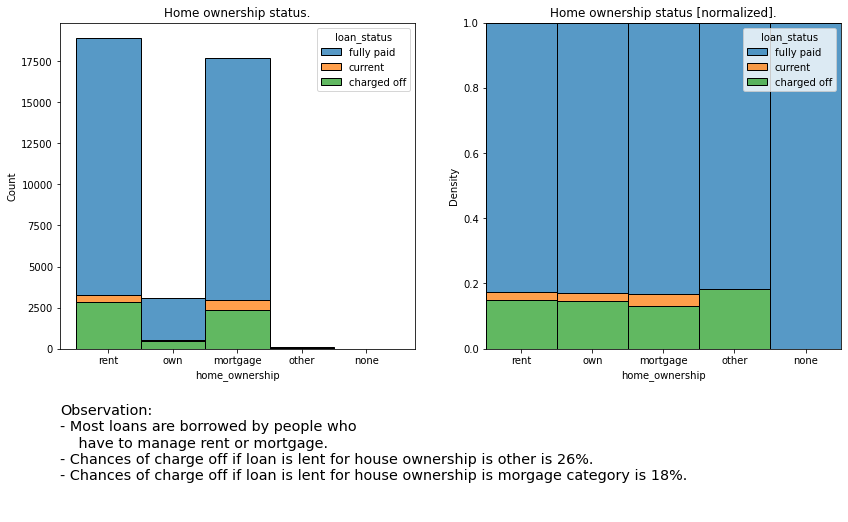

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
sns.histplot(x=df["home_ownership"], hue=df.loan_status, hue_order=["fully paid", "current", "charged off"], multiple="stack", discrete =True, ax=ax[0])
sns.histplot(x=df["home_ownership"], hue=df.loan_status, hue_order=["fully paid", "current", "charged off"], multiple="fill", stat="density", ax=ax[1])

conclusion='''
Observation:
- Most loans are borrowed by people who 
    have to manage rent or mortgage.
- Chances of charge off if loan is lent for house ownership is other is 26%.
- Chances of charge off if loan is lent for house ownership is morgage category is 18%.

'''
ax[0].set_title("Home ownership status.")
ax[1].set_title("Home ownership status [normalized].")
_ = plt.text(x=-6.5, y=-0.5, s=conclusion, fontsize="x-large")
plt.show()

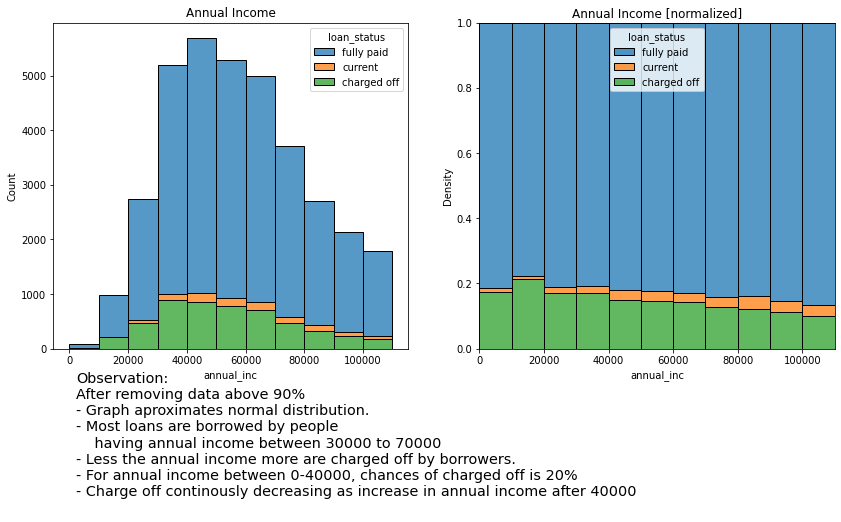

In [32]:
income_90_per = df["annual_inc"].quantile(.9)
annual_inc = df[df["annual_inc"]<=income_90_per]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
sns.histplot(x=annual_inc["annual_inc"], hue=annual_inc.loan_status, hue_order=["fully paid", "current", "charged off"], bins=range(0, 120000, 10000), multiple="stack", ax=ax[0])
sns.histplot(x=annual_inc["annual_inc"], hue=annual_inc.loan_status, hue_order=["fully paid", "current", "charged off"], bins=range(0, 120000, 10000), 
             multiple="fill", stat="density", ax=ax[1])

conclusion='''
Observation:
After removing data above 90%
- Graph aproximates normal distribution.
- Most loans are borrowed by people
    having annual income between 30000 to 70000
- Less the annual income more are charged off by borrowers.
- For annual income between 0-40000, chances of charged off is 20%
- Charge off continously decreasing as increase in annual income after 40000 
'''
ax[0].set_title("Annual Income")
ax[1].set_title("Annual Income [normalized]")
_ = plt.text(x=-125000, y=-0.5, s=conclusion, fontsize="x-large")
plt.show()

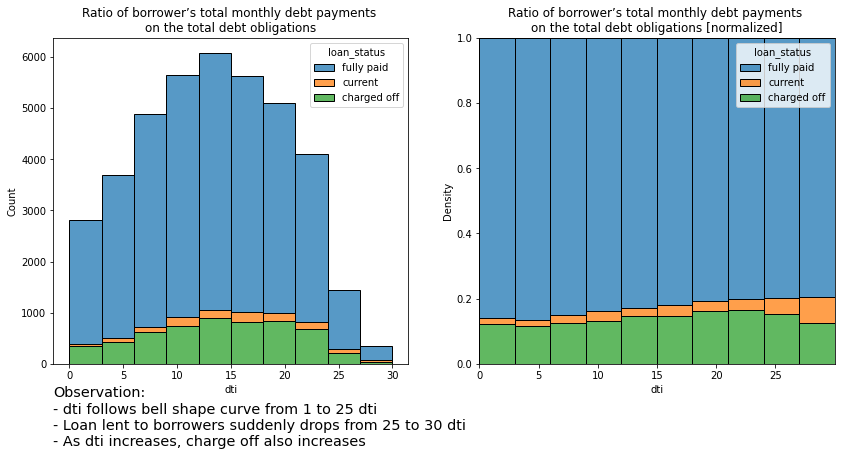

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
sns.histplot(x=df["dti"], hue=df.loan_status, hue_order=["fully paid", "current", "charged off"], multiple="stack", bins=10, ax=ax[0])
sns.histplot(x=df["dti"], hue=df.loan_status, hue_order=["fully paid", "current", "charged off"], multiple="fill", bins=10, stat="density", ax=ax[1])

conclusion='''
Observation:
- dti follows bell shape curve from 1 to 25 dti
- Loan lent to borrowers suddenly drops from 25 to 30 dti
- As dti increases, charge off also increases
'''

ax[0].set_title("Ratio of borrower’s total monthly debt payments \non the total debt obligations")
ax[1].set_title("Ratio of borrower’s total monthly debt payments \non the total debt obligations [normalized]")
_ = plt.text(x=-36, y=-0.3, s=conclusion, fontsize="x-large")
plt.show()

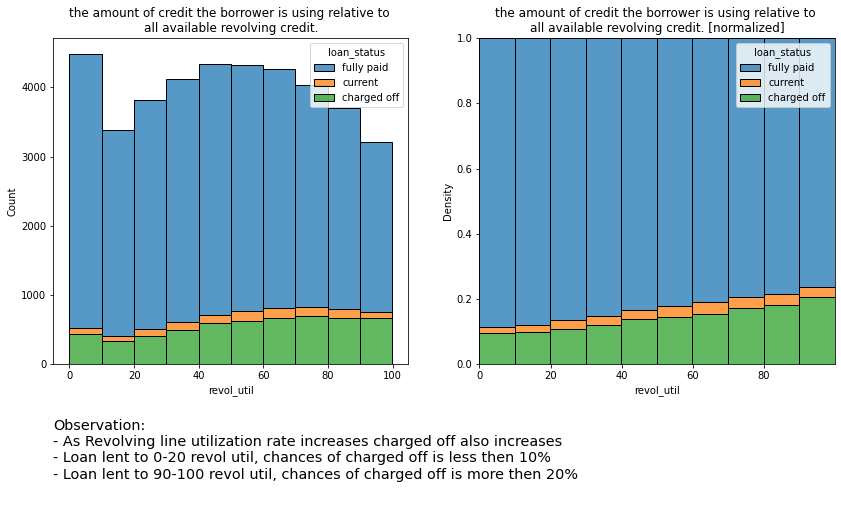

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
sns.histplot(x=df.revol_util, hue=df.loan_status, hue_order=["fully paid", "current", "charged off"], multiple="stack", bins=10, ax=ax[0])
sns.histplot(x=df.revol_util, hue=df.loan_status, hue_order=["fully paid", "current", "charged off"], multiple="fill", bins=10, stat="density", ax=ax[1])

conclusion='''
Observation:
- As Revolving line utilization rate increases charged off also increases
- Loan lent to 0-20 revol util, chances of charged off is less then 10%
- Loan lent to 90-100 revol util, chances of charged off is more then 20%
'''

ax[0].set_title("the amount of credit the borrower is using relative to \nall available revolving credit.")
ax[1].set_title("the amount of credit the borrower is using relative to \nall available revolving credit. [normalized]")
_ = plt.text(x=-120, y=-0.4, s=conclusion, fontsize="x-large")
plt.show()

# Recommendations for approving loan to avoid charged off

### Interest rate
- As company increases interest rate, chances of charge off also increases<br>
        Interest Rate_________________charged off
         5-7                           7%
         15                            20%
         24                           >40%
    Compnay should provide loan at lower interest rate when ever possible so that borrower can easily return payment and also business dont suffer from charged off

### Term  
- Company should provide loan mostly for 36 month period since as we increase term from 36 to 60 chances of charged off increases significantly<br>
         Term_________________charged off
         5-7                     7%
         15                     20%
         24                     >40%
    Comapny is already giving most loanes for 36 months which is good for business.

### Loan amount
- Company should incremently increase amount for customers since with increase in loan amount, charge off also increases<br>
         Loan amount___________charged off
         0-15000                     18%
         30000-35000                 >20%

### Grade
- Company should try to give more A, B grade loans since in A, B grade loans there is only 10% chance of charged off
- Company should avoid giving loan to E, F, G grade<br>
         Grade_________________charged off
         A, B                     10%
         C, D                     20%
         E, F, G                  33-36%
    Company is already giving more loan to A, B grade and avoiding F, G grade

### Purpose
- Comany should avoide giving loans to small businesses, renewable energy and for education without considering there potential to grow and return.
- Highest number of charged off loan is lent for small business.<br>
         Purpose_________________charged off
         small business          10%
         renewable energy        20%
         education               33-36%

### Annual income
- Company should avoide giving loan to customers who have low annual income then 40000.
- Less the annual income more are charged off by borrowers.
- For annual income between 0-40000, chances of charged off is 20%
- Charge off continously decreasing as increase in annual income after 40000 

### DTI
- Company should avoide giving loan to higher dti customers since as dti increases, charge off also increases.

### Revolving line utilization
- Comapny should avoide giving loan to customer who have high revolving line utilization rate since as revolving line utilization rate increases charged off also increases
         Revo util_ ____________charged off
         0-20                    10%
         90-100                  20%